In [1]:
import os
from glob import glob 

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

/Users/afraca/Documents/deep-base/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/afraca/Documents/deep-base/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/afraca/Documents/deep-base/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/afraca

In [2]:
data_paths = glob('dataset/cifar/train/*.png')

In [3]:
os.listdir('dataset/cifar/train/')[0]

'32270_deer.png'

In [4]:
path = data_paths[0]
path

'dataset/cifar/train/32270_deer.png'

In [5]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

image.shape

TensorShape([32, 32, 3])

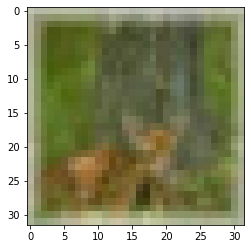

In [6]:
plt.imshow(image)
plt.show()

In [7]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

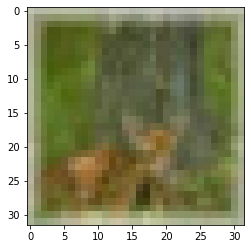

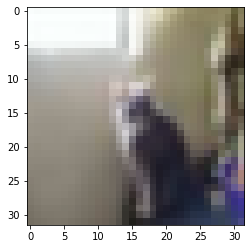

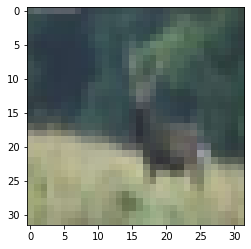

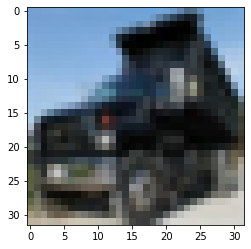

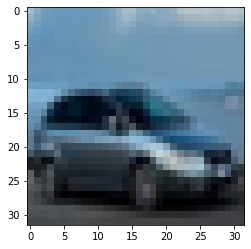

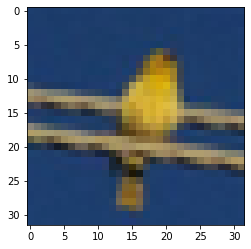

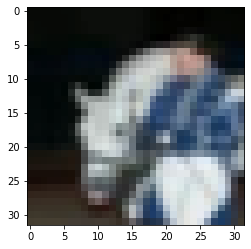

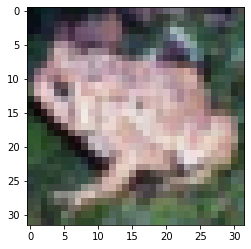

In [8]:
for i in range(8):
    plt.imshow(read_image(data_paths[i]))
    plt.show()

# Batch

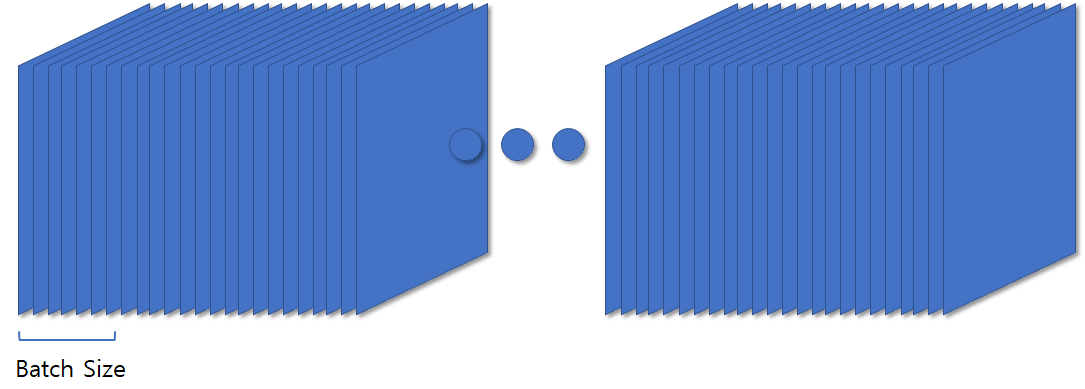

## Images in List

In [9]:
batch_images = []

In [10]:
for path in data_paths[:8]:
    image = read_image(path)
    batch_images.append(image)

In [11]:
image.shape

TensorShape([32, 32, 3])

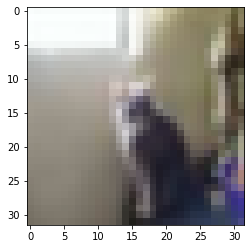

In [12]:
plt.imshow(batch_images[1])
plt.show()

In [13]:
np.array(batch_images).shape

(8, 32, 32, 3)

In [14]:
batch = tf.convert_to_tensor(batch_images)

In [15]:
batch.shape

TensorShape([8, 32, 32, 3])

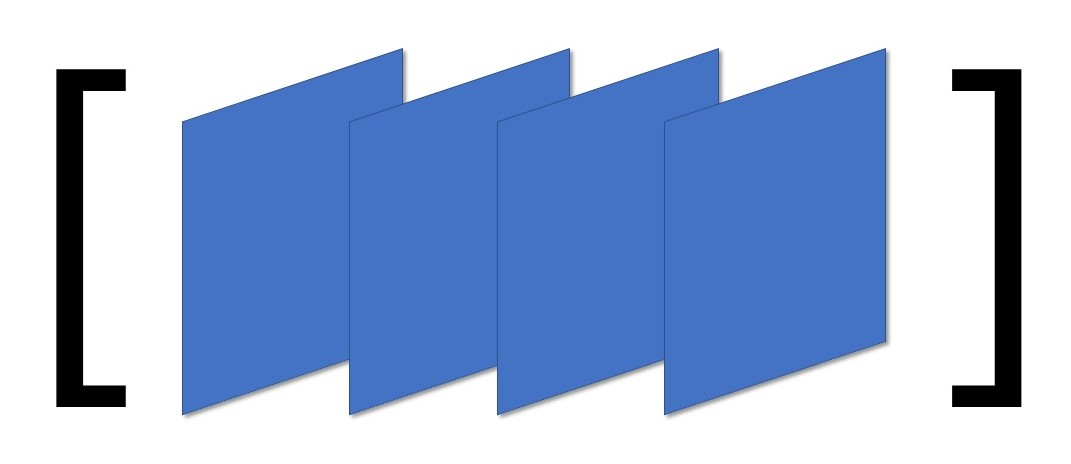

# Batch Size

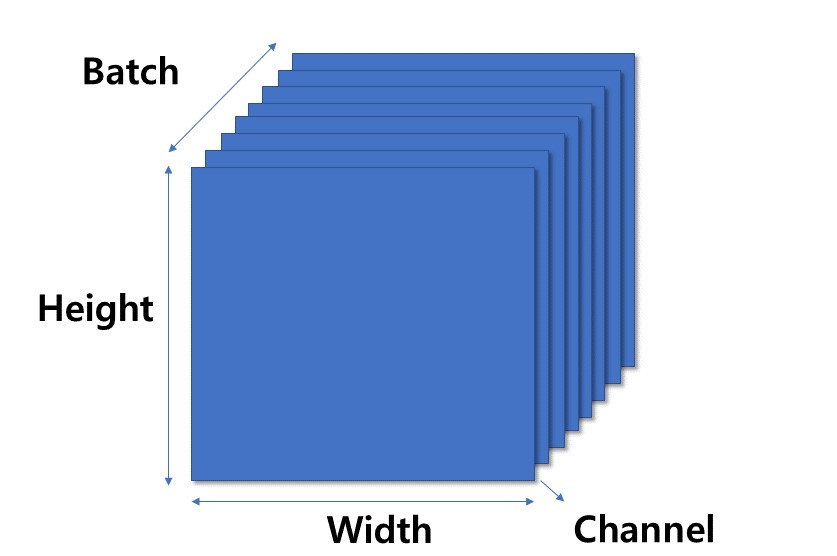

(batch_size, height, width, channel)

In [16]:
def make_batch(batch_paths):
    batch_images = []

    for path in batch_paths:
        image = read_image(path)
        batch_images.append(image)

    return tf.convert_to_tensor(batch_images)

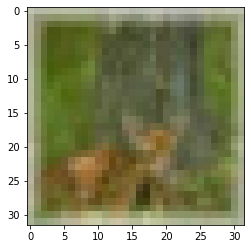

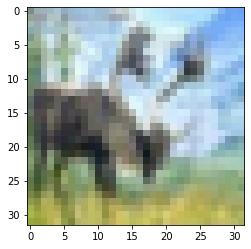

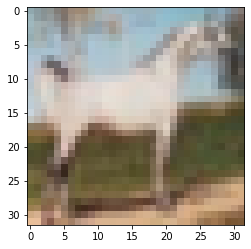

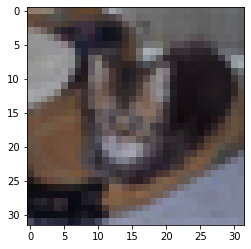

In [17]:
batch_size = 16
for step in range(4):
    batch_images = make_batch(data_paths[step * batch_size : (step + 1 ) * batch_size])
    
    plt.imshow(batch_images[0])
    plt.show()

In [18]:
batch_images.shape

TensorShape([16, 32, 32, 3])